In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Binarizer
mpl.rcParams['figure.dpi'] = 400
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('./data_preprocessed_binary.csv')

In [3]:
df['식전혈당'].value_counts()

0    924629
1    924629
Name: 식전혈당, dtype: int64

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [5]:
features_response = df.columns.tolist()

In [6]:
print(features_response)

['성별코드', '연령대코드', '허리둘레', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', 'AST', 'ALT', '감마지티피', '흡연상태', '음주여부', '복부비만', '비만여부', '고혈압', '식전혈당']


In [7]:
data = df[features_response].iloc[:,:-1].values
target = df[features_response].iloc[:,-1].values
print(data.shape, target.shape)

(1849258, 18) (1849258,)


In [8]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [9]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile

[f_stat, f_p_value] = f_classif(data,target)
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                         'F statistic':f_stat,
                         'p value':f_p_value})
f_test_df.sort_values('Feature')

,Feature,F statistic,p value
11,ALT,46369.081333,0.000000
10,AST,26040.332806,0.000000
5,HDL콜레스테롤,67000.823421,0.000000
6,LDL콜레스테롤,26019.819393,0.000000
12,감마지티피,48640.393619,0.000000
17,고혈압,63899.449513,0.000000
15,복부비만,56068.328273,0.000000
16,비만여부,43238.988595,0.000000
0,성별코드,21511.803088,0.000000
1,연령대코드,162229.176708,0.000000


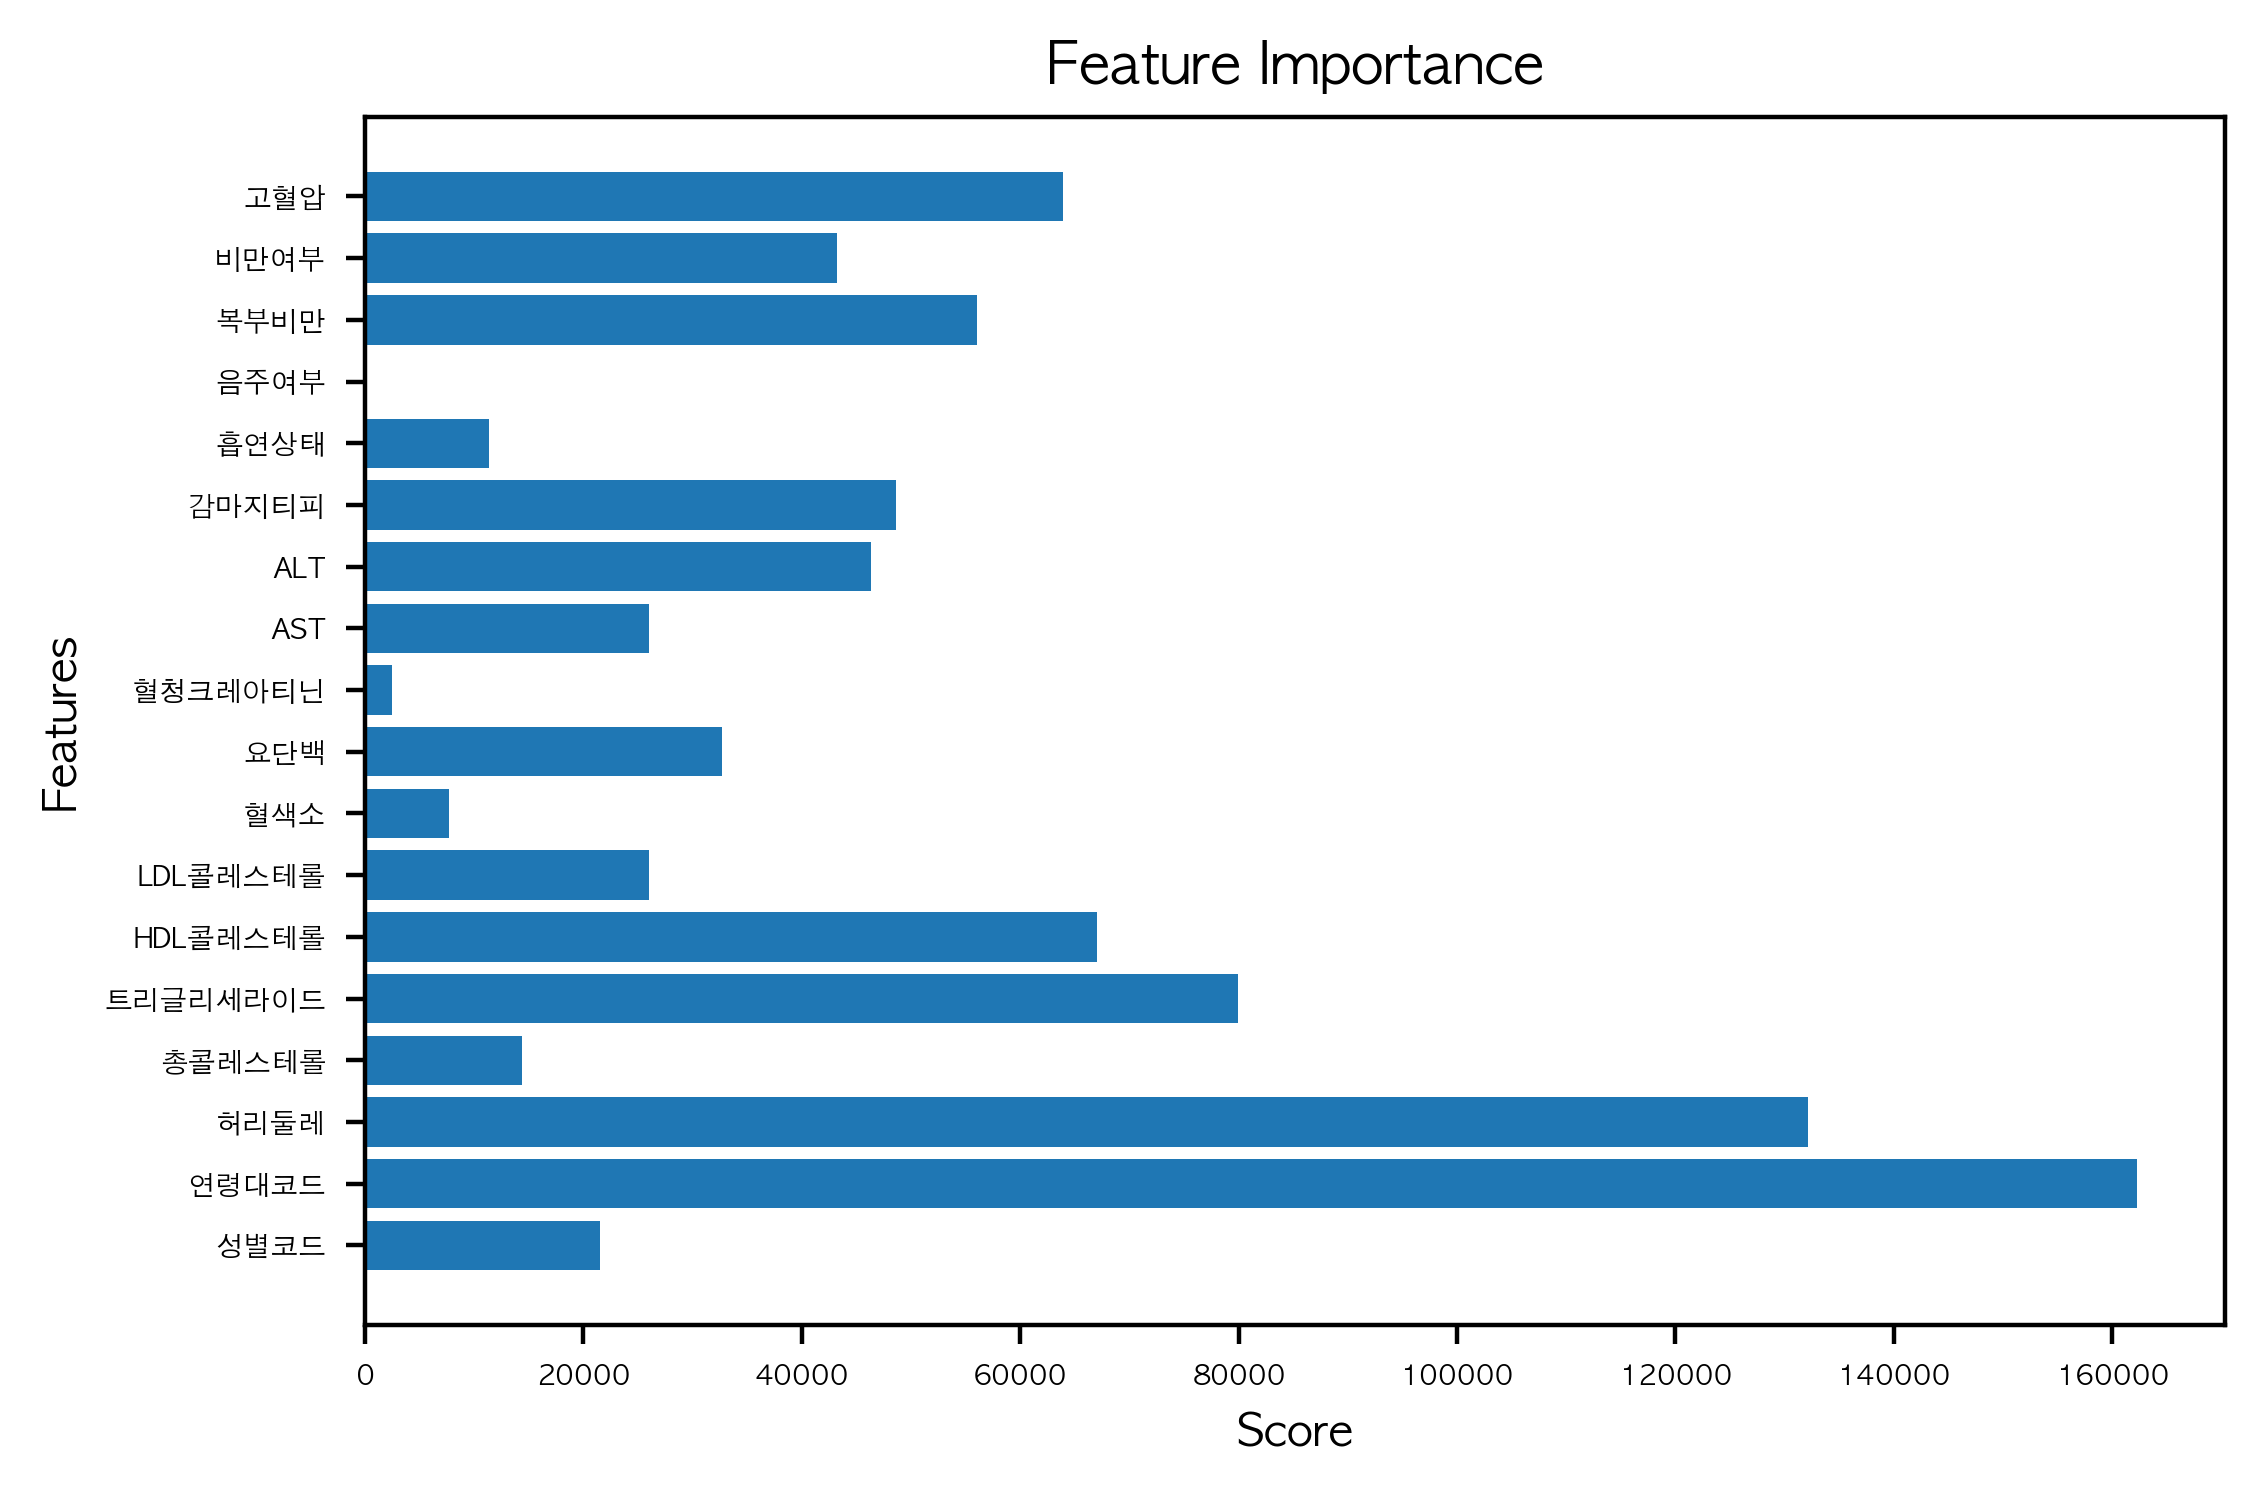

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
array = df.values
X = array[:,0:18]
Y = array[:,18]

selectK = SelectKBest(score_func=f_classif, k='all')
selectK.fit(X,Y)
selectK.scores_

label = np.array(['성별코드', '연령대코드', '허리둘레', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', 'AST', 'ALT', '감마지티피', '흡연상태', '음주여부', '복부비만', '비만여부', '고혈압'])
index = np.arange(len(label))

plt.barh(label, selectK.scores_)
plt.ylabel("Features",fontsize=8)
plt.xlabel("Score",fontsize=8)
plt.title("Feature Importance",fontsize=10)
plt.yticks(index, label, fontsize=5, rotation=0)
plt.xticks(fontsize=5, rotation=0)
plt.show()

In [21]:
df_f_by_s = pd.DataFrame({
    'Features' : ['성별코드', '연령대코드', '허리둘레', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', 'AST', 'ALT', '감마지티피', '흡연상태', '음주여부', '복부비만', '비만여부', '고혈압'],
    'Scores' : [2.15118031e+04, 1.62229177e+05, 1.32154324e+05, 1.43383200e+04,
 7.99698889e+04, 6.70008234e+04, 2.60198194e+04, 7.69479862e+03,
 3.26479260e+04, 2.45652197e+03, 2.60403328e+04, 4.63690813e+04,
 4.86403936e+04, 1.13289999e+04, 1.63406346e+00, 5.60683283e+04,
 4.32389886e+04, 6.38994495e+04]
})

In [22]:
df_f_by_s

,Features,Scores
0,성별코드,21511.803100
1,연령대코드,162229.177000
2,허리둘레,132154.324000
3,총콜레스테롤,14338.320000
4,트리글리세라이드,79969.888900
5,HDL콜레스테롤,67000.823400
6,LDL콜레스테롤,26019.819400
7,혈색소,7694.798620
8,요단백,32647.926000
9,혈청크레아티닌,2456.521970


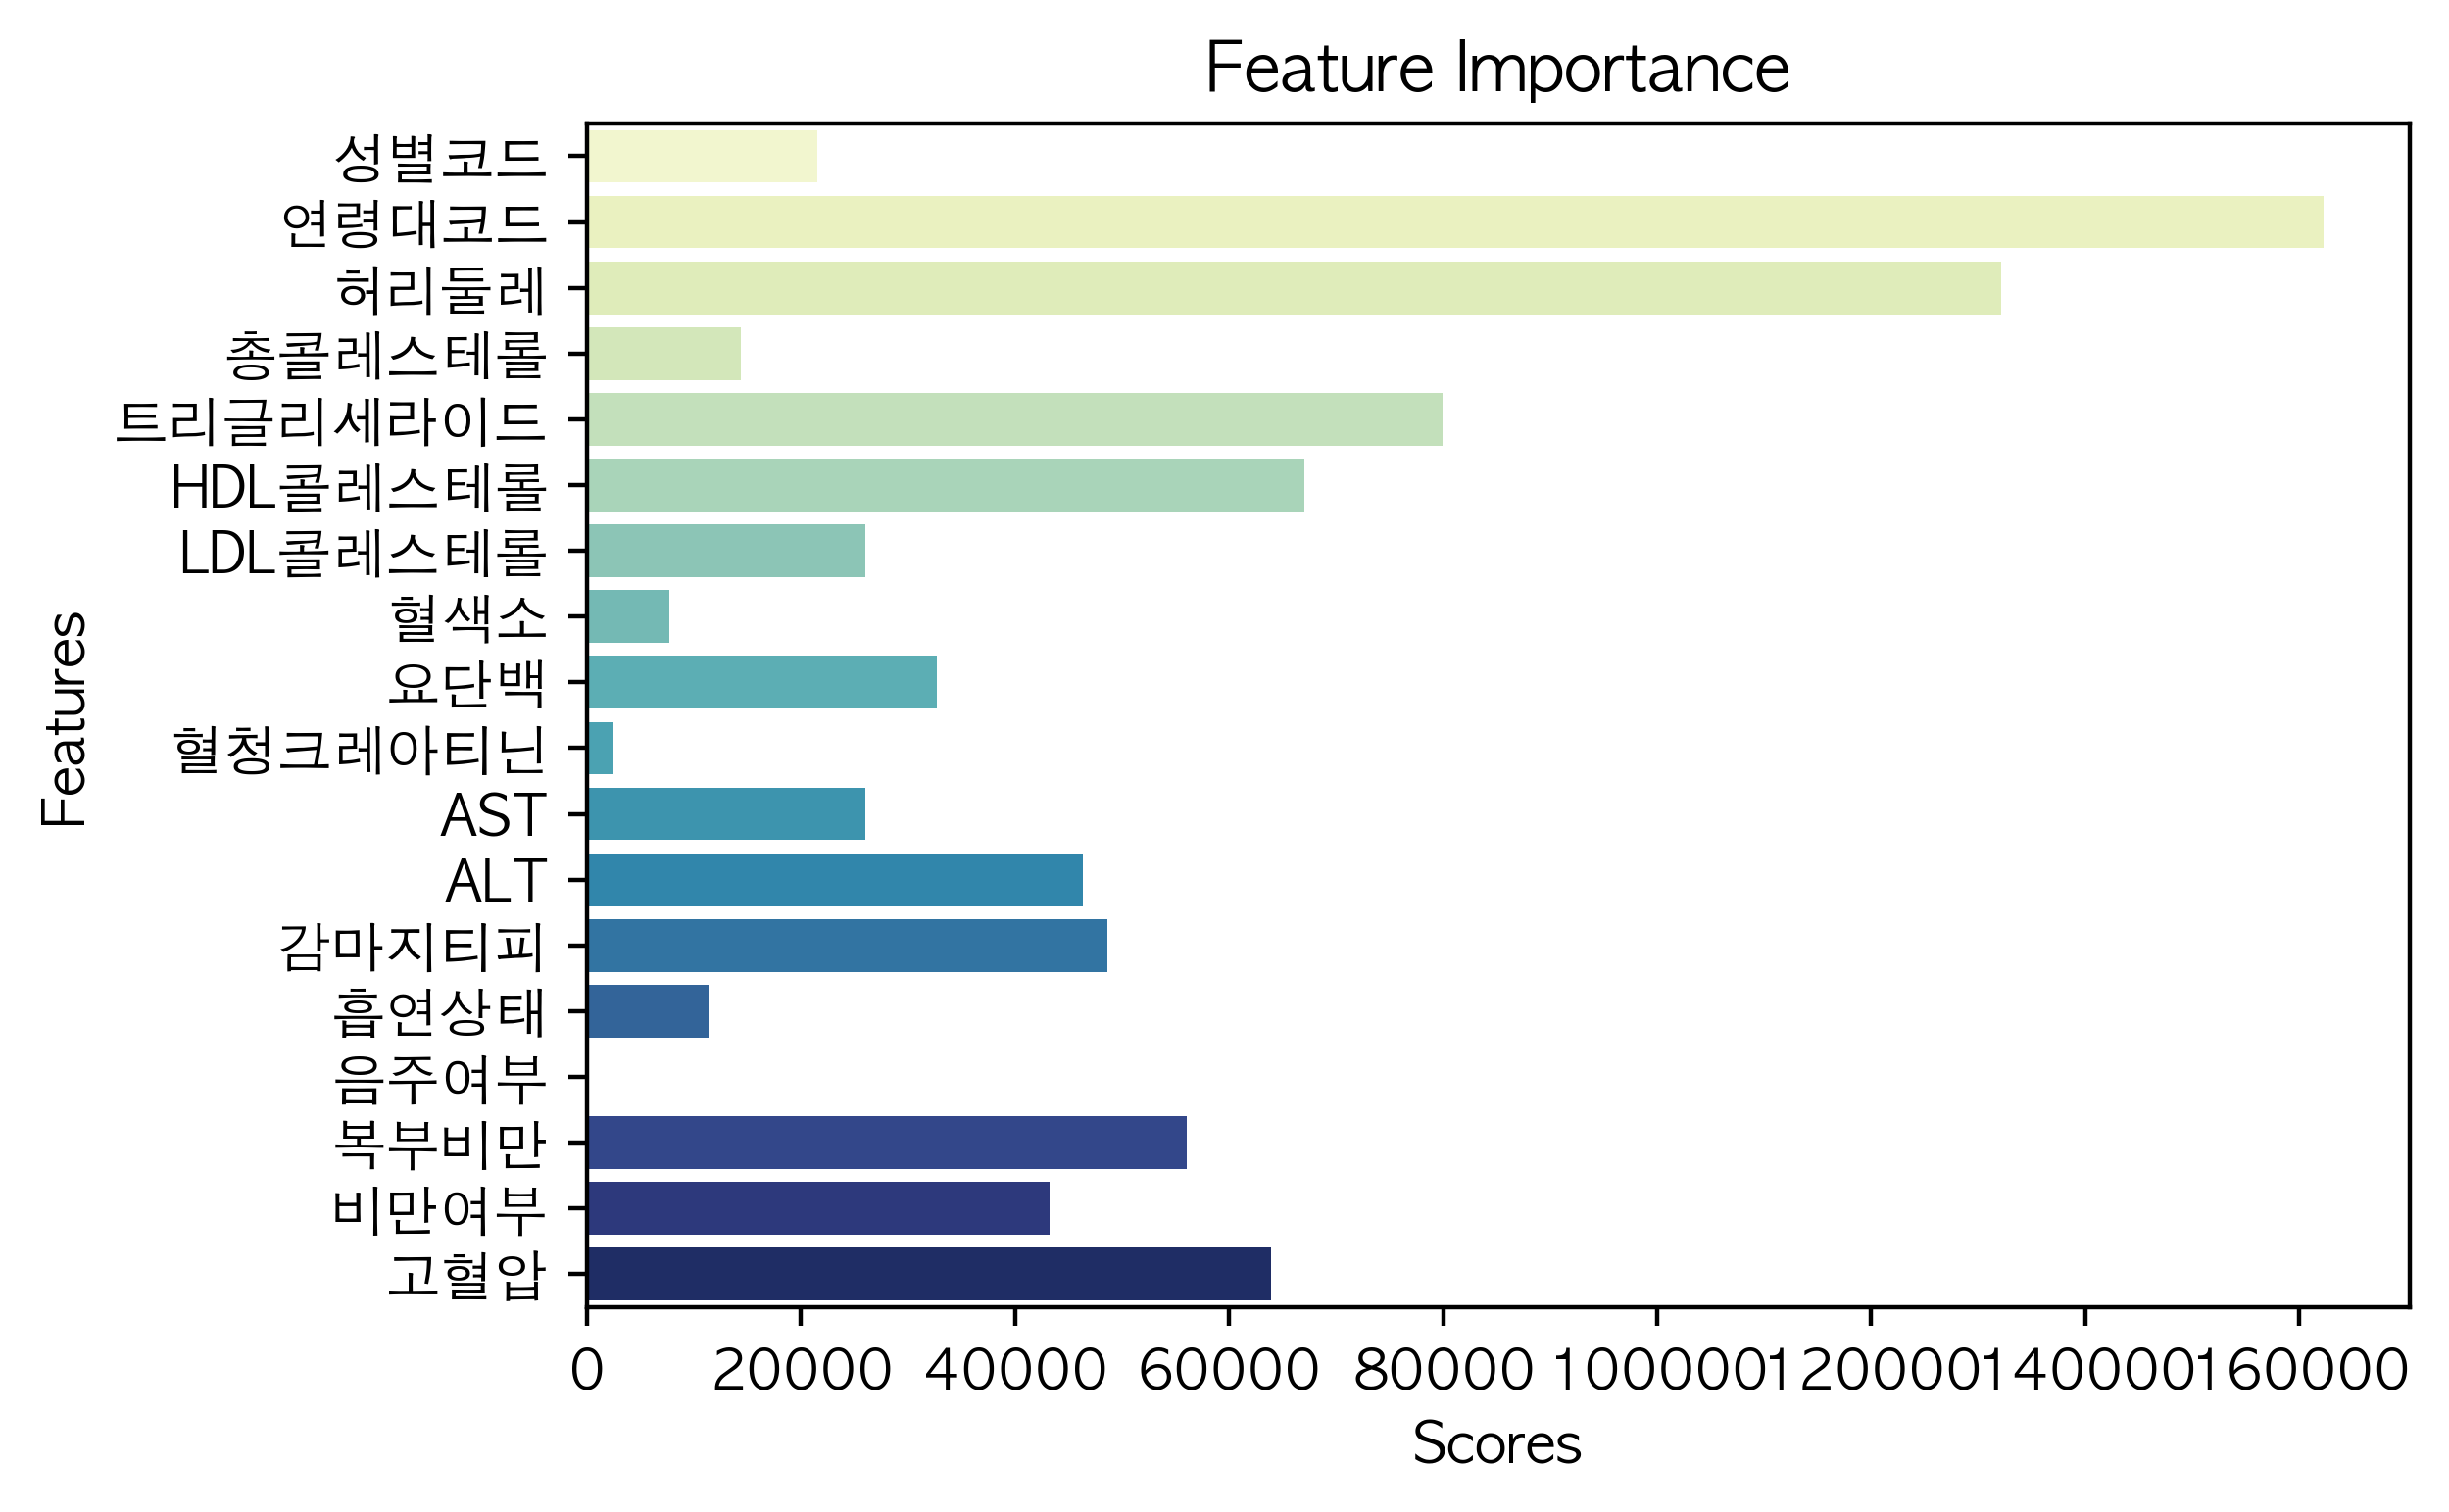

In [24]:
ax = sns.barplot(y=df_f_by_s['Features'], x=df_f_by_s['Scores'], palette="YlGnBu")
plt.title('Feature Importance')
plt.show(ax)

In [25]:
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(f_classif, percentile=25)
selector.fit(data,target)
best_feature_ix = selector.get_support()
best_feature_ix

array([False,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True])

In [26]:
features = features_response[:-1]
best_features = [features[counter] for counter in range(len(features))
                if best_feature_ix[counter]]

In [27]:
print(best_features)

['연령대코드', '허리둘레', '트리글리세라이드', 'HDL콜레스테롤', '고혈압']


In [28]:
data = df[best_features].values
target = df['식전혈당'].values

X_train , X_test, y_train , y_test = train_test_split(data, target, test_size=0.25, random_state=0, stratify=target)

In [29]:
model = LogisticRegression(C = 0.1, penalty = 'l2')
model.fit(X_train, y_train)
predicts = model.predict(X_test)

In [30]:
print('학습결과: ', model.score(X_train, y_train))
print('테스트결과: ', model.score(X_test, y_test))

학습결과:  0.6700376295204633
테스트결과:  0.6699631203832884


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [32]:
get_clf_eval(y_test, predicts)

오차행렬:
 [[148201  82957]
 [ 69624 161533]]

정확도: 0.6700
정밀도: 0.6607
재현율: 0.6988
F1: 0.6792
AUC: 0.6700


In [33]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2'],
        'C':[0.001, 0.01, 0.1, 1, 5, 10]}

grid_clf = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data, target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.670


In [34]:
from sklearn.model_selection import cross_val_score , cross_validate

scores = cross_val_score(model,data,target)
print("교차 검증 점수: {}".format(scores))
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 점수: [0.66977602 0.67048441 0.67039248 0.66869902 0.6708972 ]
교차 검증 평균 점수: 0.67


In [35]:
model = LogisticRegression(C = 0.01, penalty = 'l2')
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [36]:
print('학습결과: ', model.score(X_train, y_train))
print('테스트결과: ', model.score(X_test, y_test))

학습결과:  0.6700333034594789
테스트결과:  0.6699674464380346


In [37]:
get_clf_eval(y_test, pred)

오차행렬:
 [[148202  82956]
 [ 69623 161534]]

정확도: 0.6700
정밀도: 0.6607
재현율: 0.6988
F1: 0.6792
AUC: 0.6700


In [38]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_test, pred_proba):
  # threshold의 ndarray와 threshold 값별 정밀도, 재현율에 대한 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    f1 = 2 * (precisions * recalls) / (precisions + recalls)
  
  # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize = (8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle = "--", label = "precision")
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle = ":", label = 'recall')
    plt.plot(thresholds, f1[:thresholds_boundary], linestyle = ':',  label = 'f1')
    # thresholds의 값 X축 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(0, 1, 0.1), 2))

    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

<ipython-input-38-439291e2d8e8>:5: RuntimeWarning: invalid value encountered in true_divide
  f1 = 2 * (precisions * recalls) / (precisions + recalls)


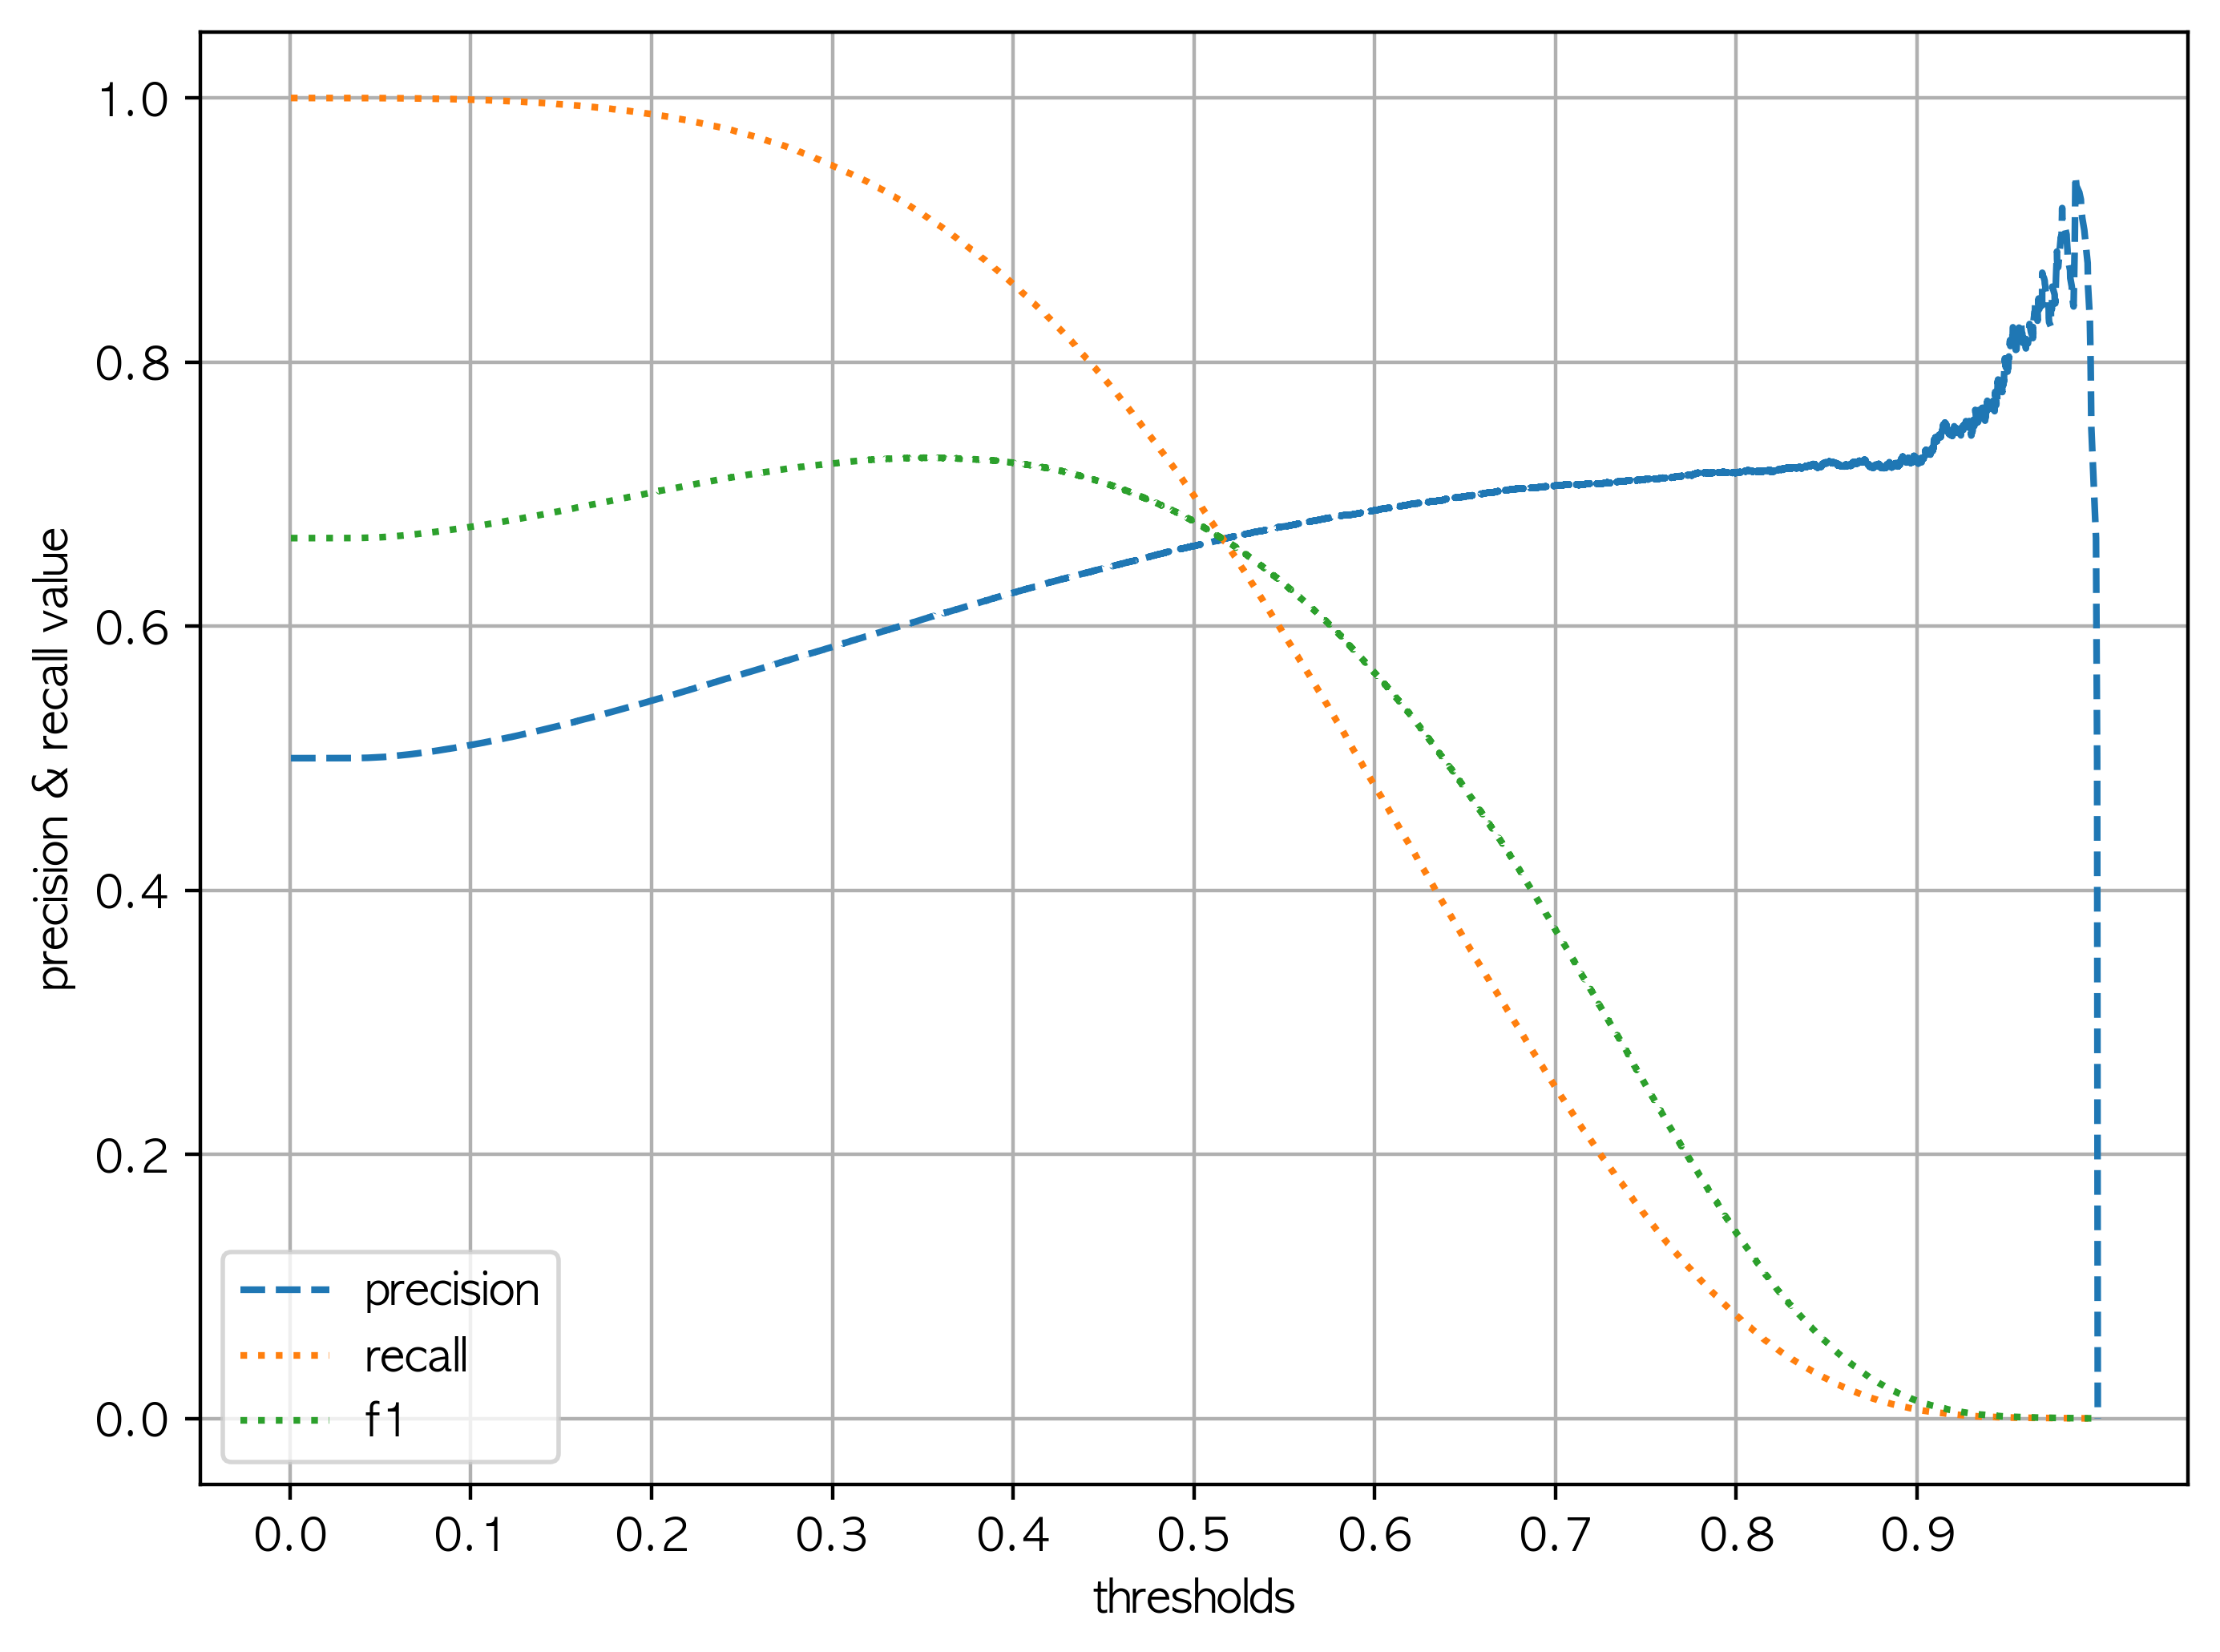

In [39]:
# 임계값별로 정밀도-재현율 시각화
pred_proba = model.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba)

In [40]:
# 평가지표를 조사하기 위한 새로운 함수 생성
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
      # thresholds list 객체 내의 값을 iteration하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('-----------------')
        print('임계값: ', custom_threshold)
        print('-----------------')
        get_clf_eval(y_test, custom_predict)
        print('-----------------')

In [41]:
# 임계값 변화에 대한 예측 성능 확인
thresholds = [0.40, 0.42, 0.44, 0.46, 0.48, 0.50, 0.52, 0.54, 0.56, 0.58, 0.6]
pred_proba = model.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

-----------------
임계값:  0.4
-----------------
오차행렬:
 [[112139 119019]
 [ 32590 198567]]

정확도: 0.6721
정밀도: 0.6252
재현율: 0.8590
F1: 0.7237
AUC: 0.6721
-----------------
-----------------
임계값:  0.42
-----------------
오차행렬:
 [[119524 111634]
 [ 38543 192614]]

정확도: 0.6752
정밀도: 0.6331
재현율: 0.8333
F1: 0.7195
AUC: 0.6752
-----------------
-----------------
임계값:  0.44
-----------------
오차행렬:
 [[126785 104373]
 [ 45410 185747]]

정확도: 0.6760
정밀도: 0.6402
재현율: 0.8036
F1: 0.7127
AUC: 0.6760
-----------------
-----------------
임계값:  0.46
-----------------
오차행렬:
 [[133945  97213]
 [ 52816 178341]]

정확도: 0.6755
정밀도: 0.6472
재현율: 0.7715
F1: 0.7039
AUC: 0.6755
-----------------
-----------------
임계값:  0.48
-----------------
오차행렬:
 [[141223  89935]
 [ 60945 170212]]

정확도: 0.6736
정밀도: 0.6543
재현율: 0.7363
F1: 0.6929
AUC: 0.6736
-----------------
-----------------
임계값:  0.5
-----------------
오차행렬:
 [[148202  82956]
 [ 69623 161534]]

정확도: 0.6700
정밀도: 0.6607
재현율: 0.6988
F1: 0.6792
AUC: 0.6700
-----------------


In [42]:
# 임계값을 0.44로 설정하여 예측 수행
binarizer = Binarizer(threshold = 0.44)

# Binarizer를 이용하여 예측값 반환
pred_th_044 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1)) 

get_clf_eval(y_test, pred_th_044)

오차행렬:
 [[126785 104373]
 [ 45410 185747]]

정확도: 0.6760
정밀도: 0.6402
재현율: 0.8036
F1: 0.7127
AUC: 0.6760


In [43]:
roc_auc_score(y_test, pred_th_044)

0.6760155468411844